# Monte Carlo Simulation of the Random Background

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
from scipy.stats import norm

## RandomBackgroundV1

In [2]:
detector_area=5*185*16 ## in cm^2
flux_by_second=detector_area*1/60 ##muonic flux in one detector each second
sampling_time= 15E-9
t_0= 0
t_f= 1

In [3]:
flux_by_sample= flux_by_second*sampling_time

In [4]:
flux_by_second

246.66666666666666

In [65]:
t=t_0
progress=0

det1_list=[]
det2_list=[]
det3_list=[]

while t<=t_f:
    m1=np.random.poisson(lam=flux_by_sample)
    m2=np.random.poisson(lam=flux_by_sample)
    m3=np.random.poisson(lam=flux_by_sample)
    
    if m1!=0:
        det1_list.append({'Muons': m1, 'Time': t})
    if m2!=0:
        det2_list.append({'Muons': m2, 'Time': t})
    if m3!=0:
        det3_list.append({'Muons': m3, 'Time': t})
    
    newprogress= int((t-t_0)/(t_f-t_0)*100)
    if progress!=newprogress:
        progress=newprogress
        print("%3d %% \r" % progress, end="")
    t+=sampling_time

det1 = pd.DataFrame(det1_list,columns=['Muons', 'Time'])
det2 = pd.DataFrame(det2_list,columns=['Muons', 'Time'])
det3 = pd.DataFrame(det3_list,columns=['Muons', 'Time'])

In [75]:
display(det3)
display(det2)
display(det1)

,Muons,Time
0,1,0.000784
1,1,0.003849
2,1,0.015281
3,1,0.018760
4,1,0.019913
...,...,...
252,1,0.968571
253,1,0.977647
254,1,0.980989
255,1,0.996652


,Muons,Time
0,1,0.004400
1,1,0.006181
2,1,0.008989
3,1,0.020685
4,1,0.020830
...,...,...
250,1,0.991367
251,1,0.997255
252,1,0.998394
253,1,0.998592


,Muons,Time
0,1,0.001772
1,1,0.008355
2,1,0.012898
3,1,0.016118
4,1,0.018914
...,...,...
260,1,0.991444
261,1,0.991524
262,1,0.992583
263,1,0.993502


## RandomBackgroundV2

In [76]:
detector_area=5*185*16 ## in cm^2
flux=1 ## muons by cm^2 by minute
flux_by_second=detector_area*flux/60 ##muonic flux in one detector each second
sampling_time= 15E-9

t_0= 0
t_f= 1

In [78]:
timestamps=[t_0+sampling_time*i for i in range(int((t_f-t_0)/sampling_time))]

In [91]:
det_1=np.random.poisson(lam=flux_by_second*(t_f-t_0))
det_2=np.random.poisson(lam=flux_by_second*(t_f-t_0))
det_3=np.random.poisson(lam=flux_by_second*(t_f-t_0))

In [ ]:
np.random.choice(timestamps, size=det_1, replace=True)

## RandomBackground V3

In [9]:
detector_area=5*185*16 ## in cm^2
##muon flux in one detector each second
flux_by_second=detector_area*1/60 

t_0= 0
t_f= 0.04
time_step=1E-5

trials=50000

In [10]:
times_list=[]
probs_3_list=[]
probs_at_least2_list=[]
probs_2_list=[]

delta_t=0
while delta_t <= t_f:
    print(f'{delta_t}',end=' - ')
    successes_3=0
    successes_at_least2=0
    successes_2=0
    for i in range(trials):
        m1=np.random.poisson(lam=flux_by_second*delta_t)
        m2=np.random.poisson(lam=flux_by_second*delta_t)
        m3=np.random.poisson(lam=flux_by_second*delta_t)
        
        m1=np.heaviside(m1,0)
        m2=np.heaviside(m2,0)
        m3=np.heaviside(m3,0)
        
        if m1+m2+m3==3:
            successes_3+=1     ## three detectors are reached
        if m1+m2+m3>=2:
            successes_at_least2+=1   ## at least two detectors are reached
        if m1+m2+m3==2:
            successes_2+=1       ## only two detectors are reached
    
    probability_3= successes_3/trials
    probability_at_least2= successes_at_least2/trials
    probability_2= successes_2/trials

    times_list.append(delta_t)
    probs_3_list.append(probability_3)
    probs_at_least2_list.append(probability_at_least2)
    probs_2_list.append(probability_2)
    
    delta_t+=time_step 

    

0 - 1e-05 - 2e-05 - 3.0000000000000004e-05 - 4e-05 - 5e-05 - 6e-05 - 7.000000000000001e-05 - 8e-05 - 9e-05 - 0.0001 - 0.00011 - 0.00012 - 0.00013000000000000002 - 0.00014000000000000001 - 0.00015000000000000001 - 0.00016 - 0.00017 - 0.00018 - 0.00019 - 0.0002 - 0.00021 - 0.00022 - 0.00023 - 0.00024 - 0.00025 - 0.00026000000000000003 - 0.00027000000000000006 - 0.0002800000000000001 - 0.0002900000000000001 - 0.00030000000000000014 - 0.00031000000000000016 - 0.0003200000000000002 - 0.0003300000000000002 - 0.00034000000000000024 - 0.00035000000000000027 - 0.0003600000000000003 - 0.0003700000000000003 - 0.00038000000000000035 - 0.00039000000000000037 - 0.0004000000000000004 - 0.0004100000000000004 - 0.00042000000000000045 - 0.0004300000000000005 - 0.0004400000000000005 - 0.00045000000000000053 - 0.00046000000000000056 - 0.0004700000000000006 - 0.0004800000000000006 - 0.0004900000000000006 - 0.0005000000000000007 - 0.0005100000000000007 - 0.0005200000000000007 - 0.0005300000000000007 - 0.000

KeyboardInterrupt: 

In [26]:
def model_3(delta_t, h_scale):
    return erf(h_scale*np.asarray(delta_t))
def model_at_least2(delta_t, h_scale):
    return erf(h_scale*np.asarray(delta_t))
def model_2(time_delta, mu, sigma,amp):
    return amp*norm.pdf((time_delta - mu) / sigma)


params_3, covariance_3 = curve_fit(model_3, times_list, probs_3_list, p0=[0.1])
params_at_least2, covariance_at_least2 = curve_fit(model_at_least2, times_list, probs_at_least2_list, p0=[0.1])
params_2, covariance_2 = curve_fit(model_2, times_list, probs_2_list,p0=[0.005,0.001,1.5])

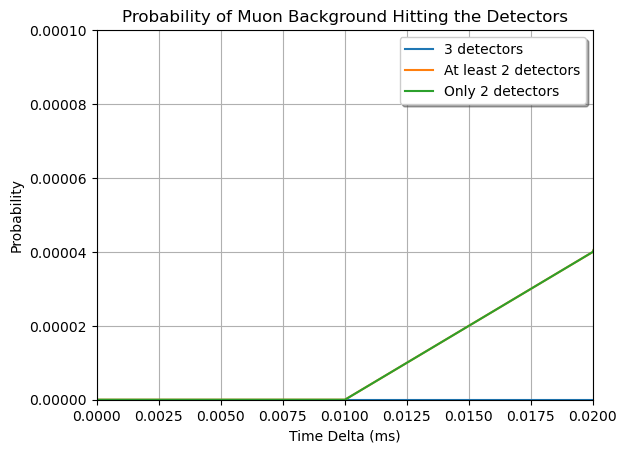

In [15]:
plt.plot(np.asarray(times_list)*1000, probs_3_list, label='3 detectors')
plt.plot(np.asarray(times_list)*1000, probs_at_least2_list, label='At least 2 detectors')
plt.plot(np.asarray(times_list)*1000, probs_2_list, label='Only 2 detectors')



plt.title('Probability of Muon Background Hitting the Detectors')
plt.xlabel('Time Delta (ms)')
plt.ylabel('Probability')
plt.grid(True)
plt.legend(loc='best', title="", shadow=True, fancybox=True)
plt.ylim(0,0.0001)
plt.xlim(0,0.02)
plt.show()


## Random Background V3.1

In [33]:
detector_area=5*185*16 ## in cm^2
##muon flux in one detector each second
flux_by_second=detector_area*1/60 

t_0= 0
t_f= 1E-13
time_step=1E-15

trials=1000000

In [34]:
times_list=[]
probs_3_list=[]
probs_at_least2_list=[]
probs_2_list=[]

delta_t=0
while delta_t <= t_f:
    print(f'{delta_t}',end=' - ')
    successes_3=0
    successes_at_least2=0
    successes_2=0
    for i in range(trials):
        m1=np.random.poisson(lam=flux_by_second*delta_t)
        m2=np.random.poisson(lam=flux_by_second*delta_t)
        m3=np.random.poisson(lam=flux_by_second*delta_t)
        
        m1=np.heaviside(m1,0)
        m2=np.heaviside(m2,0)
        m3=np.heaviside(m3,0)
        
        if m1+m2+m3==3:
            successes_3+=1     ## three detectors are reached
        if m1+m2+m3>=2:
            successes_at_least2+=1   ## at least two detectors are reached
        if m1+m2+m3==2:
            successes_2+=1       ## only two detectors are reached
    
    probability_3= successes_3/trials
    probability_at_least2= successes_at_least2/trials
    probability_2= successes_2/trials

    times_list.append(delta_t)
    probs_3_list.append(probability_3)
    probs_at_least2_list.append(probability_at_least2)
    probs_2_list.append(probability_2)
    
    delta_t+=time_step 

    

0 - 1e-15 - 2e-15 - 3.0000000000000002e-15 - 4e-15 - 5.000000000000001e-15 - 6.000000000000001e-15 - 7.000000000000002e-15 - 8.000000000000002e-15 - 9.000000000000003e-15 - 1.0000000000000003e-14 - 1.1000000000000004e-14 - 1.2000000000000004e-14 - 1.3000000000000005e-14 - 1.4000000000000005e-14 - 1.5000000000000006e-14 - 1.6000000000000004e-14 - 1.7000000000000003e-14 - 1.8000000000000002e-14 - 1.9e-14 - 2e-14 - 2.1e-14 - 2.1999999999999998e-14 - 2.2999999999999997e-14 - 2.3999999999999996e-14 - 2.4999999999999994e-14 - 2.5999999999999993e-14 - 2.6999999999999992e-14 - 2.799999999999999e-14 - 2.899999999999999e-14 - 2.999999999999999e-14 - 3.0999999999999994e-14 - 3.1999999999999996e-14 - 3.3e-14 - 3.4e-14 - 3.5e-14 - 3.6000000000000004e-14 - 3.7000000000000006e-14 - 3.800000000000001e-14 - 3.900000000000001e-14 - 4.000000000000001e-14 - 4.1000000000000015e-14 - 4.2000000000000017e-14 - 4.300000000000002e-14 - 4.400000000000002e-14 - 4.500000000000002e-14 - 4.6000000000000025e-14 - 4.7

In [32]:
probs_2_list

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

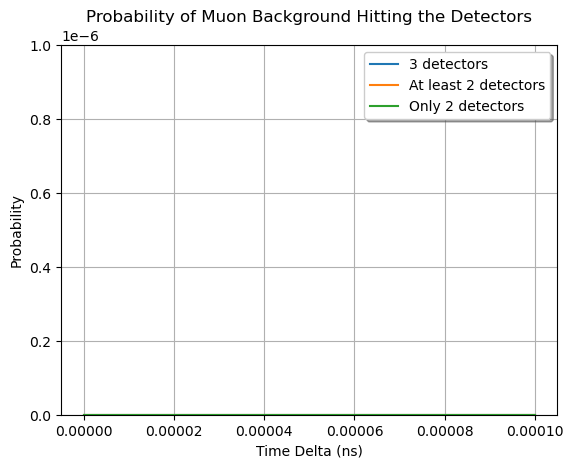

In [40]:
plt.plot(np.asarray(times_list)*1000000000, probs_3_list, label='3 detectors')
plt.plot(np.asarray(times_list)*1000000000, probs_at_least2_list, label='At least 2 detectors')
plt.plot(np.asarray(times_list)*1000000000, probs_2_list, label='Only 2 detectors')



plt.title('Probability of Muon Background Hitting the Detectors')
plt.xlabel('Time Delta (ns)')
plt.ylabel('Probability')
plt.grid(True)
plt.legend(loc='best', title="", shadow=True, fancybox=True)
plt.ylim([0,0.000001])

plt.show()


# Analytic Version

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [11]:
def bin(dt,k,n=4):
    mu_s = 5*185*16*1/60 
    c = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
    px = (1-np.exp(-1*mu_s*dt))**k
    pf = (np.exp(-1*mu_s*dt))**(n-k)
    return c*px*pf

### 3 Detectors

In [12]:
def f_2(dt,p=bin):
    return p(dt,2,n=3)

def f_at_least_2(dt,p=bin):
    return p(dt,2,n=3) +  p(dt,3,n=3)

def f_3(dt,p=bin):
    return p(dt,3,n=3)

In [13]:
time_deltas=np.linspace(0,0.040,1000)
p_2= [f_2(dt,p=bin) for dt in time_deltas]
p_at_least_2= [f_at_least_2(dt,p=bin) for dt in time_deltas]
p_3= [f_3(dt,p=bin) for dt in time_deltas]

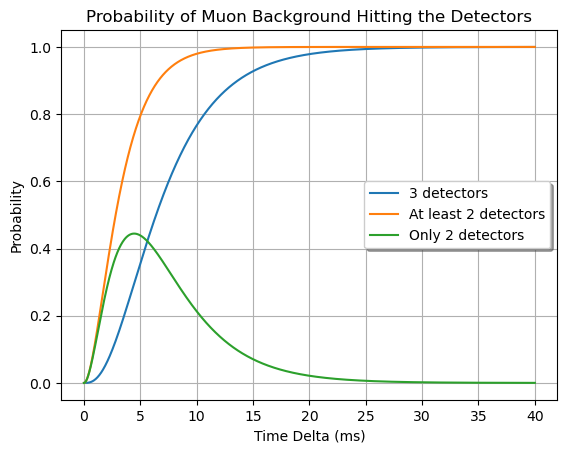

In [14]:
plt.plot(time_deltas*1000, p_3, label='3 detectors')
plt.plot(time_deltas*1000, p_at_least_2, label='At least 2 detectors')
plt.plot(time_deltas*1000, p_2, label='Only 2 detectors')



plt.title('Probability of Muon Background Hitting the Detectors')
plt.xlabel('Time Delta (ms)')
plt.ylabel('Probability')
plt.grid(True)
plt.legend(loc='best', title="", shadow=True, fancybox=True)
#plt.ylim(0,0.0001)
#plt.xlim(0,0.02)
plt.show()

### 4 Detectors

In [15]:
def f_2(dt,p=bin):
    return p(dt,2,n=4)

def f_at_least_2(dt,p=bin):
    return p(dt,2,n=4) +  p(dt,3,n=4) +  p(dt,4,n=4)

def f_3(dt,p=bin):
    return p(dt,3,n=4)

def f_at_least_3(dt,p=bin):
    return p(dt,3,n=4) +  p(dt,4,n=4)

def f_4(dt,p=bin):
    return p(dt,3,n=4)


In [16]:
time_deltas=np.linspace(0,0.040,1000)
p_2= [f_2(dt,p=bin) for dt in time_deltas]
p_at_least_2= [f_at_least_2(dt,p=bin) for dt in time_deltas]
p_3= [f_3(dt,p=bin) for dt in time_deltas]
p_at_least_3= [f_at_least_3(dt,p=bin) for dt in time_deltas]
p_4= [f_4(dt,p=bin) for dt in time_deltas]

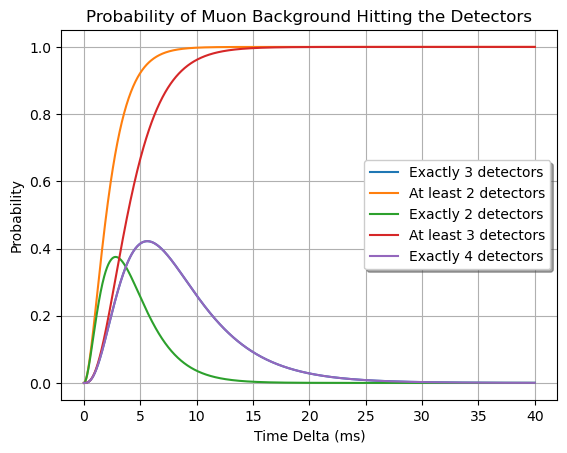

In [17]:
plt.plot(time_deltas*1000, p_3, label='Exactly 3 detectors')
plt.plot(time_deltas*1000, p_at_least_2, label='At least 2 detectors')
plt.plot(time_deltas*1000, p_2, label='Exactly 2 detectors')
plt.plot(time_deltas*1000, p_at_least_3, label='At least 3 detectors')
plt.plot(time_deltas*1000, p_4, label='Exactly 4 detectors')



plt.title('Probability of Muon Background Hitting the Detectors')
plt.xlabel('Time Delta (ms)')
plt.ylabel('Probability')
plt.grid(True)
plt.legend(loc='best', title="", shadow=True, fancybox=True)
#plt.ylim(0,0.0001)
#plt.xlim(0,0.02)
plt.show()

In [20]:
f_at_least_2(1e-15,p=bin)

3.651403430223691e-25

In [21]:
5*185*16*1/60 

246.66666666666666